In [103]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [104]:
#read the dataset
sal_data = pd.read_csv('Employee-salary-prediction.csv')
sal_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [105]:
#change the name of the columns 
sal_data.columns

sal_data.rename(columns={'Years of Experience': 'Experience_years', 'Education Level': 'Education_level', 'Job Title': 'Job_title'}, inplace=True)
sal_data.columns

Index(['Age', 'Gender', 'Education_level', 'Job_title', 'Experience_years',
       'Salary'],
      dtype='object')

In [106]:
#check rows and columns  
sal_data.shape

(375, 6)

In [107]:
#check for null values
sal_data.isnull().sum()

Age                 2
Gender              2
Education_level     2
Job_title           2
Experience_years    2
Salary              2
dtype: int64

In [108]:
#remove null values
sal_data = sal_data.dropna()
sal_data

#check for null values
sal_data.isnull().sum()

Age                 0
Gender              0
Education_level     0
Job_title           0
Experience_years    0
Salary              0
dtype: int64

In [109]:
#check for duplicates
sal_data.duplicated().sum()

49

In [110]:
#remove duplicates
sal_data = sal_data.drop_duplicates()
sal_data

,Age,Gender,Education_level,Job_title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [111]:
#check data types 
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               324 non-null    float64
 1   Gender            324 non-null    object 
 2   Education_level   324 non-null    object 
 3   Job_title         324 non-null    object 
 4   Experience_years  324 non-null    float64
 5   Salary            324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [112]:
#check correlation
corr_matrix = sal_data[['Age','Experience_years','Salary']].corr()
corr_matrix

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

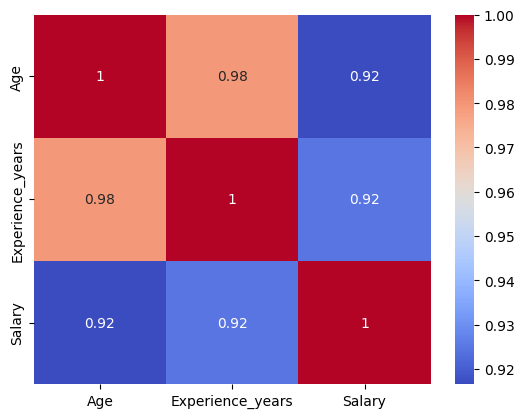

In [113]:
#visualize the data  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 


<Axes: ylabel='Gender'>

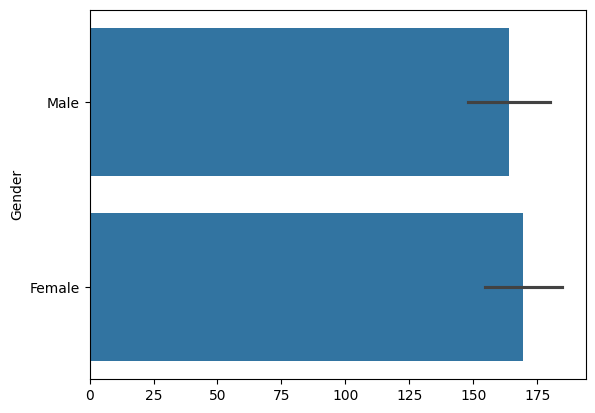

In [114]:
#Check distribution of the data
sns.barplot(sal_data['Gender'])

<Axes: xlabel='Experience_years', ylabel='Count'>

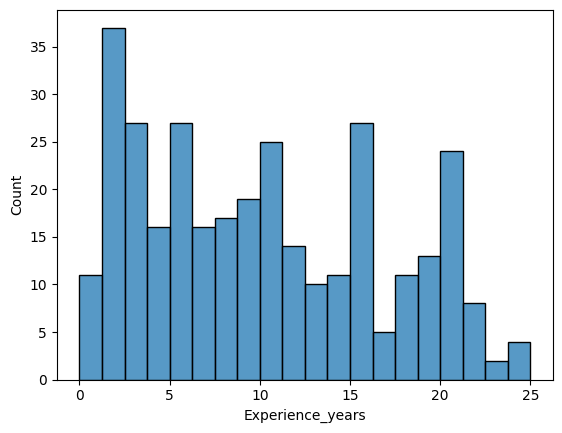

In [115]:
sns.histplot(sal_data['Experience_years'], bins=20)

<Axes: ylabel='Education_level'>

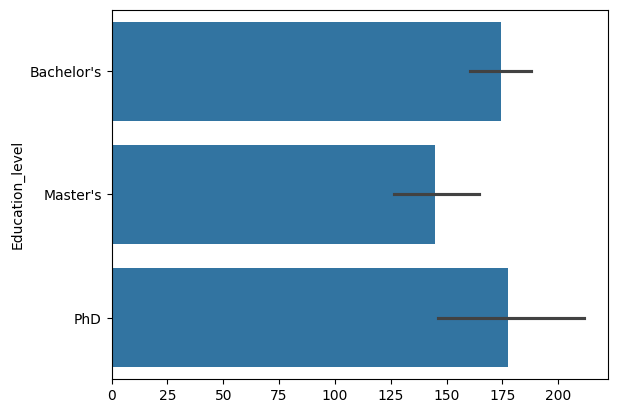

In [116]:
sns.barplot(sal_data['Education_level'])


<Axes: ylabel='Salary'>

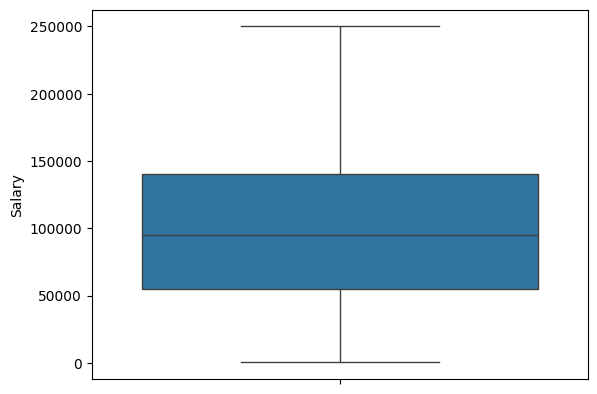

In [117]:
sns.boxplot(sal_data['Salary'])

In [118]:
#label encoding
le = LabelEncoder()
sal_data['Gender_Encode'] = le.fit_transform(sal_data['Gender'])
sal_data['Degree_Encode'] = le.fit_transform(sal_data['Education_level'])
sal_data['Job_Title_Encode'] = le.fit_transform(sal_data['Job_title'])

sal_data

,Age,Gender,Education_level,Job_title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22
...,...,...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0,0,68
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,1,0,111
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,0,2,115
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,1,0,63


In [119]:
#Standardscaler
std_scaler = StandardScaler()

sal_data['Age_scaled'] = std_scaler.fit_transform(sal_data[['Age']]) 

sal_data['Experience_scaled'] = std_scaler.fit_transform(sal_data[['Experience_years']]) 

In [120]:
#Split Data for Model Training 
x = sal_data[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_scaled']]
y = sal_data[['Salary']]


In [121]:
print(x.head())

   Age_scaled  Gender_Encode  Degree_Encode  Job_Title_Encode  \
0   -0.750231              1              0               159   
1   -1.307742              0              1                17   
2    1.061680              1              2               130   
3   -0.192720              0              0               101   
4    2.037324              1              1                22   

   Experience_scaled  
0          -0.761821  
1          -1.063017  
2           0.744158  
3          -0.460625  
4           1.497148  


In [122]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

y_train.shape, x_train.shape, x_test.shape, y_test.shape

((259, 1), (259, 5), (65, 5), (65, 1))

In [123]:
#model_development  
Linear_regression_model = LinearRegression()

Linear_regression_model.fit(x_train, y_train)


LinearRegression()

In [124]:
#Model predict
y_pred = Linear_regression_model.predict(x_test)
y_pred.shape

(65, 1)

In [125]:
# Ensure both arrays are 1D
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

# Now build the DataFrame
df = pd.DataFrame({
    'y_actual': y_test_flat,
    'y_predicted': y_pred_flat
})
df['Error'] = df['y_actual'] - df['y_predicted']
df['abs_error'] = abs(df['Error'])

print(df)


    y_actual    y_predicted         Error     abs_error
0   100000.0  117415.913446 -17415.913446  17415.913446
1   100000.0  125562.807428 -25562.807428  25562.807428
2    50000.0   48965.153862   1034.846138   1034.846138
3   110000.0  128739.348880 -18739.348880  18739.348880
4   105000.0  106828.499305  -1828.499305   1828.499305
..       ...            ...           ...           ...
60   80000.0  117279.788471 -37279.788471  37279.788471
61   85000.0   83396.821876   1603.178124   1603.178124
62  170000.0  177743.761029  -7743.761029   7743.761029
63   75000.0   72275.144274   2724.855726   2724.855726
64   95000.0   86307.613619   8692.386381   8692.386381

[65 rows x 4 columns]


In [126]:
#Model Evaluation
r2_score(y_test, y_pred)

0.891123106651709

In [127]:
print(f'Accuracy of the Model = {round(r2_score(y_test, y_pred), 4) * 100} %')

Accuracy of the Model = 89.11 %


In [128]:
#mean absolute error
round(mean_absolute_error(y_test, y_pred))
print(f'Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred),2)}')

Mean Absolute Error = 10570.79


In [129]:
#mean saured error
mse = mean_squared_error(y_test, y_pred)
print (f'mse = {round(mse)}')

mse = 205754136


In [130]:
Linear_regression_model.coef_

array([[2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
        1.92043082e+04]])

In [131]:
Linear_regression_model.intercept_

array([86001.49320553])

In [132]:
#Use the model 
#Age = 49
#Gender = 'Female' =0
#Degree = 'PhD' = 2
#Job_title = 'Director' = 22
#Experience_years = 15
#Salary = ?

In [133]:
Age1 = std_scaler.transform([[49]])[0][0]
Age= 5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])[0][0]
Experience_years = 0.744158145
#Find the salary = ?

In [134]:
#predict the salary of employee
Emp_salary = Linear_regression_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])[0][0]
Emp_salary = round(Emp_salary, 2)
print(Emp_salary)

249925.15


In [135]:
print(f"Salary of the Employee based on data above is ${round(Emp_salary, 2)}")

Salary of the Employee based on data above is $249925.15
